In [1]:
'''
1.download data
    train
    valid
    test
2.Create model
    from scratch    
3.Train and test model
    from scratch

5.Create model
    transfer learning
6.Train and test model
    transfer learning

'''

'\n1.download data\n    train\n    valid\n    test\n2.Create model\n    from scratch    \n3.Train and test model\n    from scratch\n\n5.Create model\n    transfer learning\n6.Train and test model\n    transfer learning\n\n'

In [2]:
import torch
import numpy as np
from torchvision import datasets
import torchvision.transforms as transforms
from PIL import Image,ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

use_cuda = torch.cuda.is_available()

if not use_cuda:
    print('Training on CPU')
else:
    print('Training on GPU')

Training on GPU


In [3]:
# number of subprocesses to use for data loading
num_workers = 0
# how many samples per batch to load
batch_size = 20


data_dir = 'C:/Users/user/Pictures/dogImages/dogImages'
train_dir = data_dir + '/train'
valid_dir = data_dir + '/valid'
test_dir = data_dir + '/test'

In [4]:
data_transforms = {
    'train' : transforms.Compose([
    transforms.Resize(224),
    transforms.CenterCrop(224),
    transforms.RandomHorizontalFlip(), # randomly flip and rotate
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ]),
    'valid' : transforms.Compose([
    transforms.Resize(224),
    transforms.CenterCrop(224),

    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ]),
    'test' : transforms.Compose([
    transforms.Resize(224),
    transforms.CenterCrop(224),

    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ]),
}

In [5]:

image_datasets = {
    'train' : datasets.ImageFolder(root=train_dir,transform=data_transforms['train']),
    'valid' : datasets.ImageFolder(root=valid_dir,transform=data_transforms['valid']),
    'test' : datasets.ImageFolder(root=test_dir,transform=data_transforms['test']),
}

In [6]:
data_loaders = {
    'train' : torch.utils.data.DataLoader(image_datasets['train'],batch_size = batch_size,shuffle=True),
    'valid' : torch.utils.data.DataLoader(image_datasets['valid'],batch_size = batch_size),
    'test' : torch.utils.data.DataLoader(image_datasets['test'],batch_size = batch_size)    
}

In [7]:
print("Size of training set is: "+str(len(image_datasets['train'])))
print("Size of validation set is: "+str(len(image_datasets['valid'])))
print("Size of testing set is: "+str(len(image_datasets['test'])))

Size of training set is: 6680
Size of validation set is: 835
Size of testing set is: 836


In [8]:
print("Number of classes are: "+str(len(image_datasets['train'].classes)))

Number of classes are: 133


In [9]:
import os
import matplotlib.pyplot as plt                        
%matplotlib inline

path = 'C:/Users/user/Pictures/dogImages/dogImages/train'
images = []
titles = []
files = os.listdir(path)
for name in files:
    row = name.split(".")
    all_images = os.listdir(path+'/'+name)
    image = plt.imread(path+'/'+name+'/'+all_images[0])
    images.append(image)
    titles.append(row[1])
    continue

In [10]:
def show_images(images, cols = 1, titles = None):
    assert((titles is None)or (len(images) == len(titles)))
    n_images = len(images)
    if titles is None: titles = ['Image (%d)' % i for i in range(1,n_images + 1)]
    fig = plt.figure()
    for n, (image, title) in enumerate(zip(images, titles)):
        a = fig.add_subplot(cols, np.ceil(n_images/float(cols)), n + 1)
        a.set_axis_off()
        plt.axis('off')
        plt.imshow(image)
        a.set_title(title)
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_images)
    plt.show()

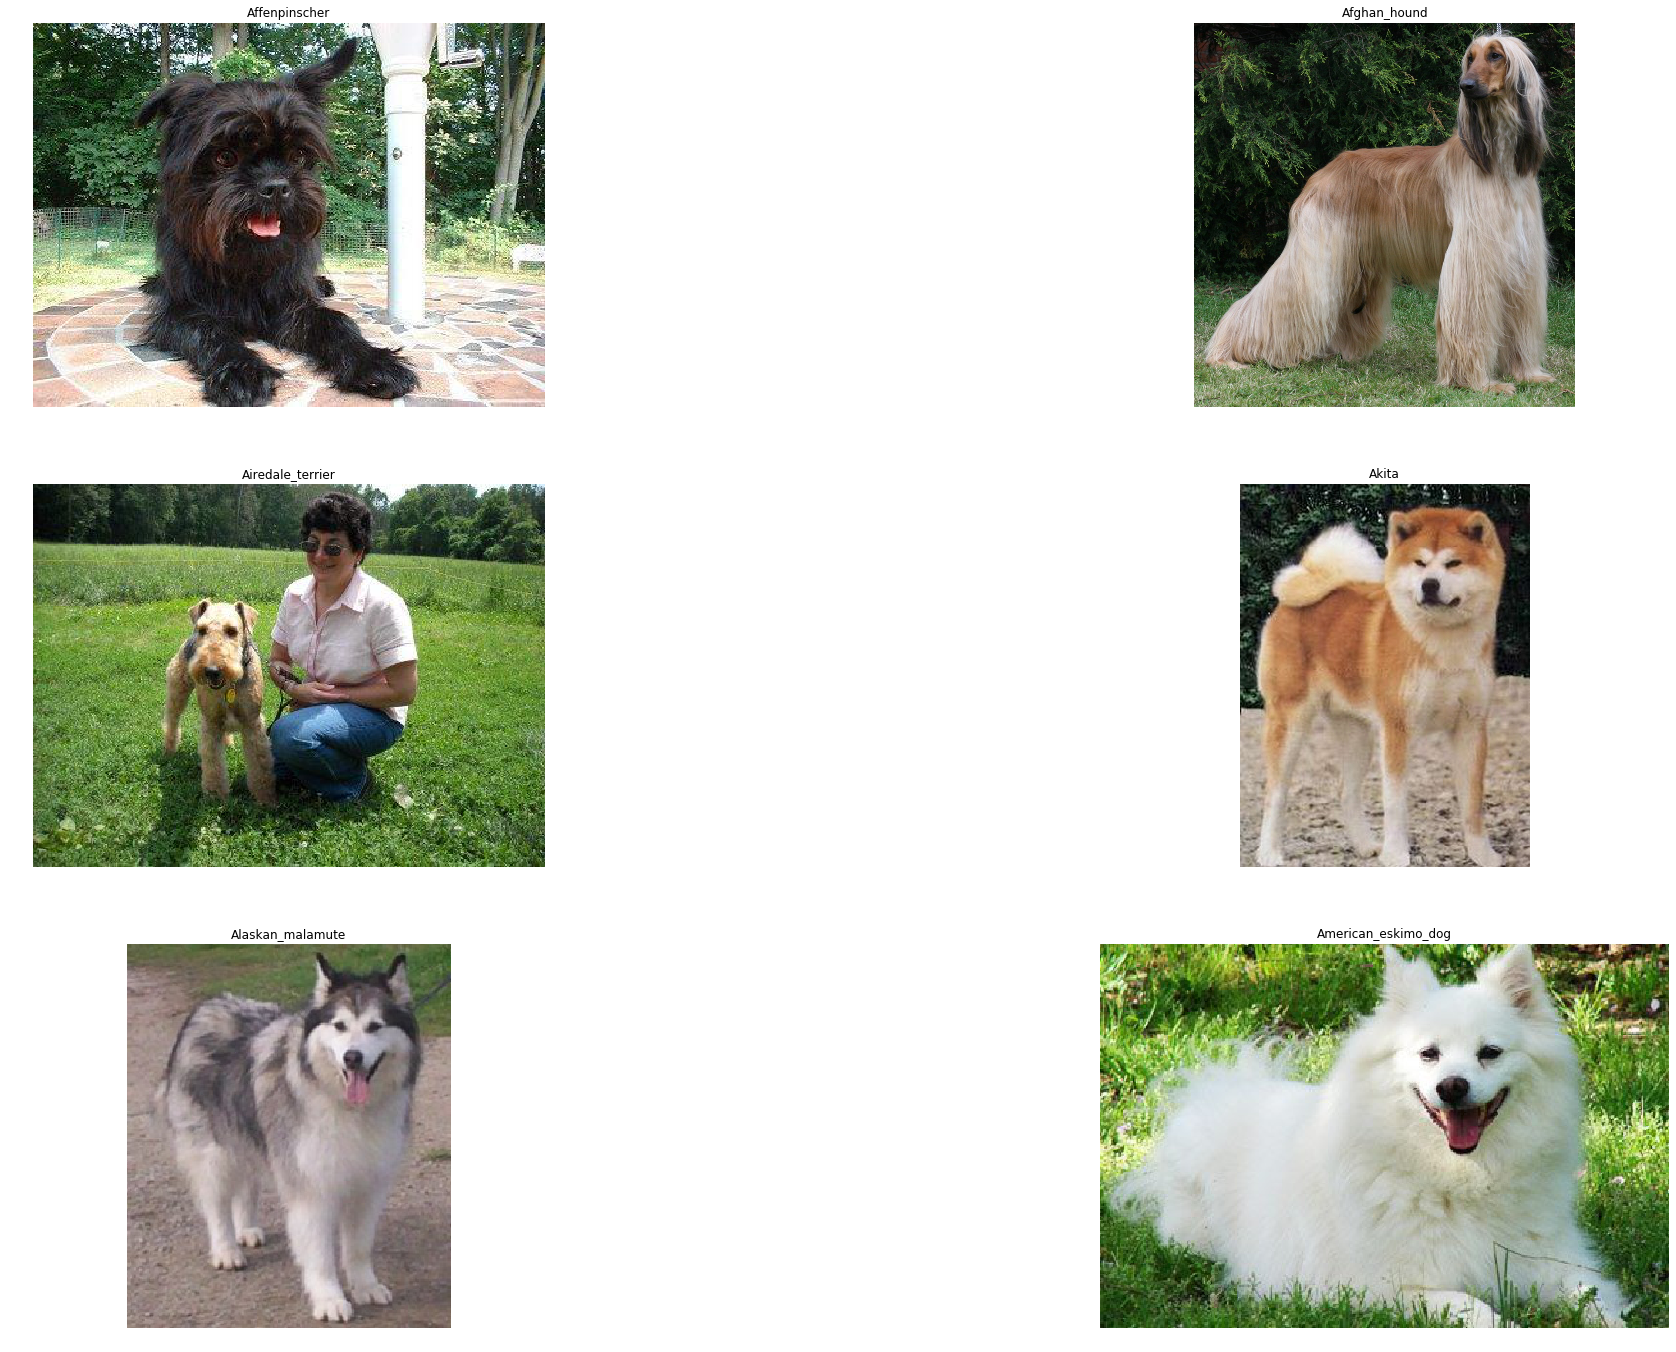

In [11]:
show_images(images[:6], 3, titles[:6])

In [12]:
import torch.nn as nn
import torch.nn.functional as F

In [13]:
class Net(nn.Module):
    
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, 3)
        self.conv2 = nn.Conv2d(16, 32, 3)
        self.conv3 = nn.Conv2d(32, 64, 3)
        self.conv4 = nn.Conv2d(64, 128, 3)
        self.conv5 = nn.Conv2d(128, 256, 3)

        self.fc1 = nn.Linear(256 * 6 * 6, 133)
        
        self.max_pool = nn.MaxPool2d(2, 2,ceil_mode=True)
        self.dropout = nn.Dropout(0.2)

        self.conv_bn1 = nn.BatchNorm2d(224,3)
        self.conv_bn2 = nn.BatchNorm2d(16)
        self.conv_bn3 = nn.BatchNorm2d(32)
        self.conv_bn4 = nn.BatchNorm2d(64)
        self.conv_bn5 = nn.BatchNorm2d(128)
        self.conv_bn6 = nn.BatchNorm2d(256)
    
    def forward(self, x):
        
        x = F.relu(self.conv1(x))
        x = self.max_pool(x)
        x = self.conv_bn2(x)
        
        x = F.relu(self.conv2(x))
        x = self.max_pool(x)
        x = self.conv_bn3(x)
        
        x = F.relu(self.conv3(x))
        x = self.max_pool(x)
        x = self.conv_bn4(x)
        
        x = F.relu(self.conv4(x))
        x = self.max_pool(x)
        x = self.conv_bn5(x)
        
        x = F.relu(self.conv5(x))
        x = self.max_pool(x)
        x = self.conv_bn6(x)
        
        x = x.view(-1, 256 * 6 * 6)
        
        x = self.dropout(x)
        x = self.fc1(x)


        return x

# instantiate the CNN
model_scratch = Net()

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

In [14]:
# specify loss function (categorical cross-entropy)
criterion_scratch = nn.CrossEntropyLoss()

# specify optimizer
optimizer_scratch = torch.optim.Adam(model_scratch.parameters(), lr=0.001)
exp_lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer_scratch, step_size=7, gamma=0.1)

In [15]:
def train(n_epochs, loaders, model, optimizer,scheduler, criterion, use_cuda, save_path):
    '''
    trains the model according to given parameters
    
    Args:
        n_epochs: Number of epochs
        loaders: data loaders
        model: model to be trained
        optimizer: optimizer needed to train the model
        criterion: specify loss function (categorical cross-entropy)
        use_cuda: use GPU if available
        save_path: path to save the model 
        
    Returns:
        returns trained model
    '''  
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        scheduler.step()
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## find the loss and update the model parameters accordingly
            # clear the gradients of all optimized variables
            optimizer.zero_grad()
            # forward pass: compute predicted outputs by passing inputs to the model
            output = model(data)
            # calculate the batch loss
            loss = criterion(output, target)
            # backward pass: compute gradient of the loss with respect to model parameters
            loss.backward()
            # perform a single optimization step (parameter update)
            optimizer.step()
            # update training loss
            ## record the average training loss, using something like
            train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## update the average validation loss
             # forward pass: compute predicted outputs by passing inputs to the model
            output = model(data)
            # calculate the batch loss
            loss = criterion(output, target)
            # update average validation loss 
            valid_loss = valid_loss + ((1 / (batch_idx + 1)) * (loss.data - valid_loss))


        # calculate average losses
        train_loss = train_loss/len(loaders['train'].dataset)
        valid_loss = valid_loss/len(loaders['valid'].dataset)

            
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## save the model if validation loss has decreased
        if valid_loss <= valid_loss_min:
            print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
            valid_loss_min,
            valid_loss))
            torch.save(model.state_dict(), save_path)
            valid_loss_min = valid_loss    
    # return trained model
    return model

In [16]:

# train the model
loaders_scratch = data_loaders
n_epochs = 10

## Please uncomment the two lines below to train the model. 
model_scratch = train(n_epochs, loaders_scratch, model_scratch, optimizer_scratch,exp_lr_scheduler, 
                      criterion_scratch, use_cuda, 'model_scratch.pt')



Epoch: 1 	Training Loss: 0.000786 	Validation Loss: 0.005610
Validation loss decreased (inf --> 0.005610).  Saving model ...
Epoch: 2 	Training Loss: 0.000615 	Validation Loss: 0.004918
Validation loss decreased (0.005610 --> 0.004918).  Saving model ...
Epoch: 3 	Training Loss: 0.000498 	Validation Loss: 0.004694
Validation loss decreased (0.004918 --> 0.004694).  Saving model ...
Epoch: 4 	Training Loss: 0.000413 	Validation Loss: 0.004537
Validation loss decreased (0.004694 --> 0.004537).  Saving model ...
Epoch: 5 	Training Loss: 0.000335 	Validation Loss: 0.004550
Epoch: 6 	Training Loss: 0.000264 	Validation Loss: 0.004665
Epoch: 7 	Training Loss: 0.000165 	Validation Loss: 0.004418
Validation loss decreased (0.004537 --> 0.004418).  Saving model ...
Epoch: 8 	Training Loss: 0.000142 	Validation Loss: 0.004418
Epoch: 9 	Training Loss: 0.000124 	Validation Loss: 0.004434
Epoch: 10 	Training Loss: 0.000112 	Validation Loss: 0.004462


In [17]:
# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))

IncompatibleKeys(missing_keys=[], unexpected_keys=[])

In [18]:
def test(loaders, model, criterion, use_cuda):
    '''
    trains the model according to given parameters
    
    Args:
        loaders: data loaders
        model: model to be trained
        criterion: specify loss function (categorical cross-entropy)
        use_cuda: use GPU if available
        
    Returns:
        print test loss and test accuracy
    '''  

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

In [19]:
# call test function    
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 3.643769


Test Accuracy: 22% (191/836)


In [20]:
from torchvision import models

model_transfer = models.resnet18(pretrained=True)
print(model_transfer)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2): Co

In [21]:
for param in model_transfer.parameters():
    param.requires_grad = False


num_ftrs = model_transfer.fc.in_features
model_transfer.fc = nn.Linear(num_ftrs, 133)

# if GPU is available, move the model to GPU
if use_cuda:
    model_transfer.cuda()

In [22]:
criterion_transfer = nn.CrossEntropyLoss()
optimizer_transfer = torch.optim.Adam(filter(lambda p: p.requires_grad,model_transfer.parameters()), lr=0.001)

In [23]:
loaders_transfer = data_loaders
n_epochs = 10
# train the model
train(n_epochs, loaders_transfer, model_transfer, optimizer_transfer, exp_lr_scheduler,criterion_transfer, use_cuda, 'model_transfer.pt')

# load the model that got the best validation accuracy (uncomment the line below)
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

Epoch: 1 	Training Loss: 0.000393 	Validation Loss: 0.001519
Validation loss decreased (inf --> 0.001519).  Saving model ...
Epoch: 2 	Training Loss: 0.000161 	Validation Loss: 0.001060
Validation loss decreased (0.001519 --> 0.001060).  Saving model ...
Epoch: 3 	Training Loss: 0.000115 	Validation Loss: 0.000897
Validation loss decreased (0.001060 --> 0.000897).  Saving model ...
Epoch: 4 	Training Loss: 0.000097 	Validation Loss: 0.000815
Validation loss decreased (0.000897 --> 0.000815).  Saving model ...
Epoch: 5 	Training Loss: 0.000081 	Validation Loss: 0.000818
Epoch: 6 	Training Loss: 0.000072 	Validation Loss: 0.000797
Validation loss decreased (0.000815 --> 0.000797).  Saving model ...
Epoch: 7 	Training Loss: 0.000068 	Validation Loss: 0.000740
Validation loss decreased (0.000797 --> 0.000740).  Saving model ...
Epoch: 8 	Training Loss: 0.000061 	Validation Loss: 0.000765
Epoch: 9 	Training Loss: 0.000057 	Validation Loss: 0.000783
Epoch: 10 	Training Loss: 0.000052 	Valida

IncompatibleKeys(missing_keys=[], unexpected_keys=[])

In [24]:
test(loaders_transfer, model_transfer, criterion_scratch, use_cuda)

Test Loss: 0.637153


Test Accuracy: 79% (666/836)


In [25]:
#different wat to use cuda

cuda_avail = torch.cuda.is_available()

device = torch.device("cuda:0" if cuda_avail else "cpu")
print("Device:", device)

Device: cuda:0


In [26]:
# Test algorithm on images provided in 'test' directory. Make predictions for each image. And show an example 
#  for each prediction.
class_names = [item[5:].replace("_", " ") for item in loaders_transfer['train'].dataset.classes]
def visualize_model(model, num_images=3):
    was_training = model.training
    model.eval()
    images_so_far = 0
    fig = plt.figure(figsize=(16,4))
    
    with torch.no_grad():
        for i, (inputs, labels) in enumerate(data_loaders['test']):
                
            inputs = inputs.to(device)   # occasionally commented this out to resolve device mismatch error
            labels = labels.to(device)   # occasionally commented this out to resolve device mismatch error

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
        
            for j in range(inputs.size()[0]):
                images_so_far += 1
                inp = inputs.cpu().data[j]
                inp = inp.numpy().transpose((1, 2, 0))
                mean = np.array([0.485, 0.456, 0.406])
                std = np.array([0.229, 0.224, 0.225])
                inp = std * inp + mean
                inp = np.clip(inp, 0, 1)

                ax = fig.add_subplot(1, 3, images_so_far)
                ax.imshow(inp.squeeze(), cmap="gray", interpolation='nearest')        
                plt.title('predicted: {}'.format(class_names[preds[j]]))
                plt.axis('off')

                if images_so_far == num_images:
                    model.train(mode=was_training)
                    return
            plt.show()
        model.train(mode=was_training)

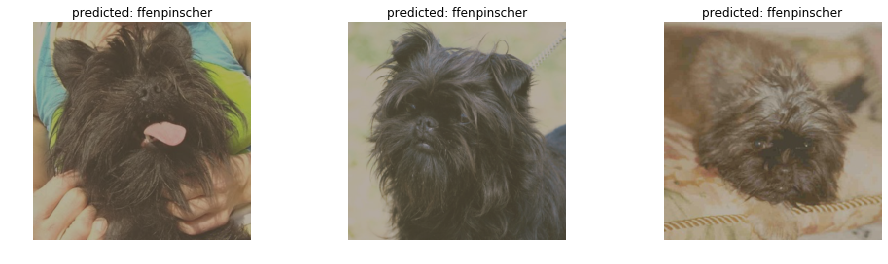

In [27]:
visualize_model(model_transfer)

In [28]:
from PIL import Image
import torchvision.transforms as transforms

def load_input_image(img_path):    
    image = Image.open(img_path).convert('RGB')
    prediction_transform = transforms.Compose([transforms.Resize(size=(224, 224)),
                                     transforms.ToTensor()])

    # discard the transparent, alpha channel (that's the :3) and add the batch dimension
    image = prediction_transform(image)[:3,:,:].unsqueeze(0)
    return image

In [29]:
def predict_breed_transfer(model, class_names, img_path):
    # load the image and return the predicted breed
    img = load_input_image(img_path)
    model = model.cpu()
    model.eval()
    idx = torch.argmax(model(img))
    return class_names[idx]

In [30]:
def run_app(img_path):
    ## handle cases for a human face, dog, and neither
    img = Image.open(img_path)
    plt.imshow(img)
    plt.show()
    prediction = predict_breed_transfer(model_transfer, class_names, img_path)
    print("Dogs Detected!\nIt looks like a {0}".format(prediction))  

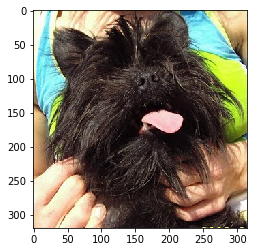

Dogs Detected!
It looks like a ffenpinscher


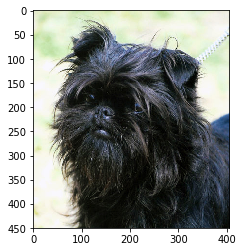

Dogs Detected!
It looks like a ffenpinscher


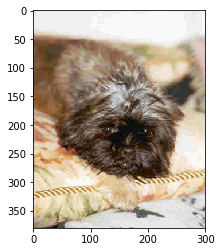

Dogs Detected!
It looks like a astiff


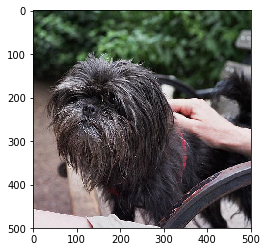

Dogs Detected!
It looks like a ffenpinscher


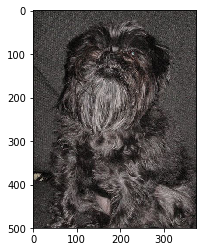

Dogs Detected!
It looks like a ffenpinscher


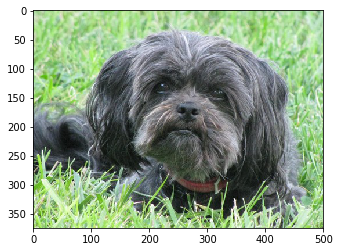

Dogs Detected!
It looks like a altese


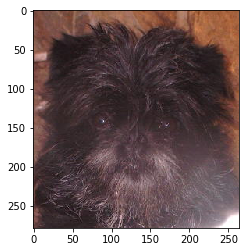

Dogs Detected!
It looks like a ffenpinscher


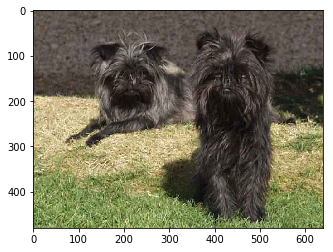

Dogs Detected!
It looks like a ffenpinscher


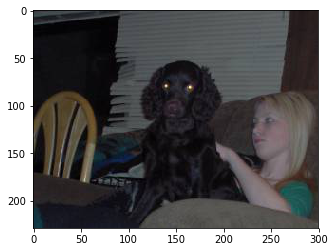

Dogs Detected!
It looks like a ewfoundland


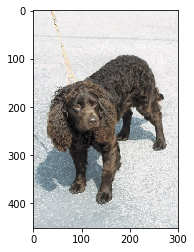

Dogs Detected!
It looks like a merican water spaniel


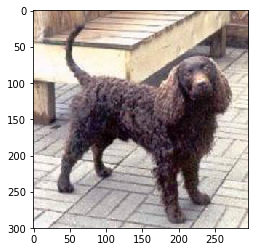

Dogs Detected!
It looks like a urly-coated retriever


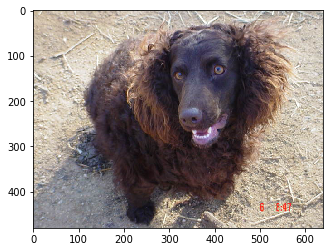

Dogs Detected!
It looks like a oykin spaniel


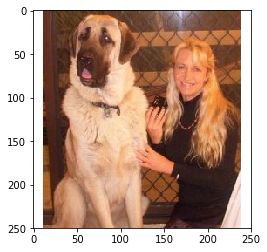

Dogs Detected!
It looks like a abrador retriever


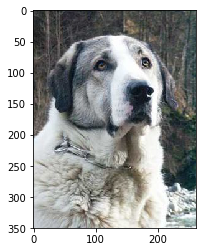

Dogs Detected!
It looks like a natolian shepherd dog


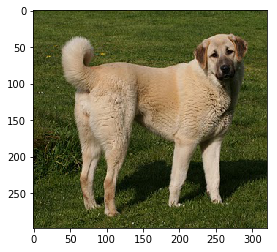

Dogs Detected!
It looks like a natolian shepherd dog


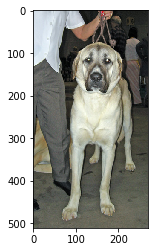

Dogs Detected!
It looks like a merican staffordshire terrier


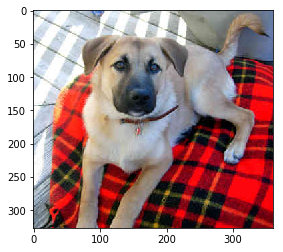

Dogs Detected!
It looks like a reat dane


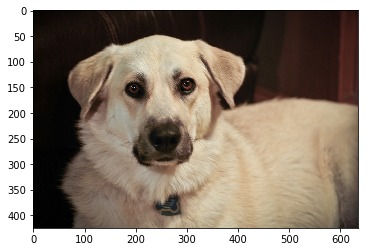

Dogs Detected!
It looks like a abrador retriever


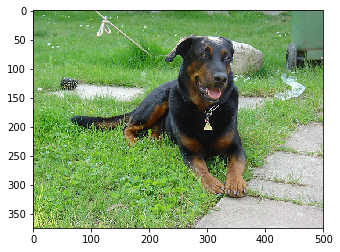

Dogs Detected!
It looks like a oberman pinscher


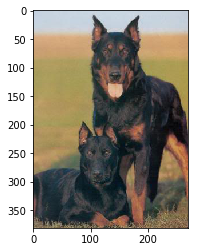

Dogs Detected!
It looks like a oberman pinscher


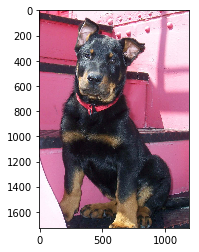

Dogs Detected!
It looks like a eauceron


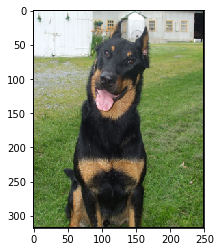

Dogs Detected!
It looks like a eauceron


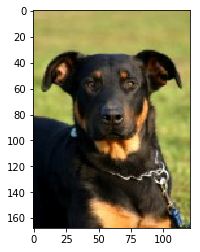

Dogs Detected!
It looks like a erman pinscher


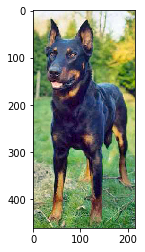

Dogs Detected!
It looks like a lack and tan coonhound


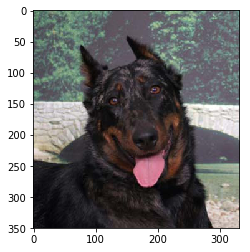

Dogs Detected!
It looks like a oberman pinscher


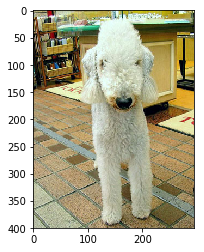

Dogs Detected!
It looks like a edlington terrier


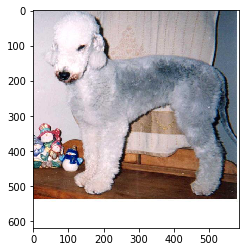

Dogs Detected!
It looks like a edlington terrier


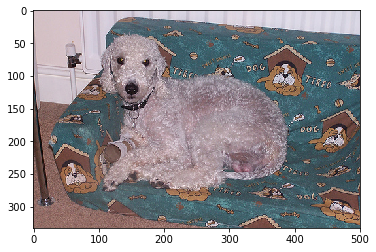

Dogs Detected!
It looks like a ointer


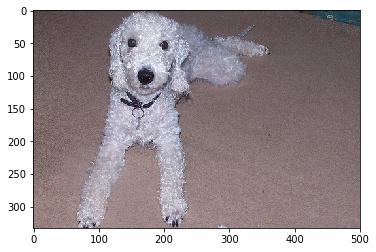

Dogs Detected!
It looks like a merican foxhound


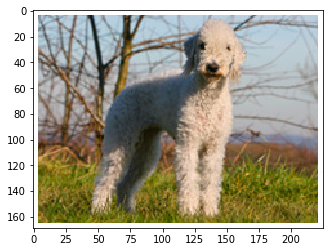

Dogs Detected!
It looks like a edlington terrier


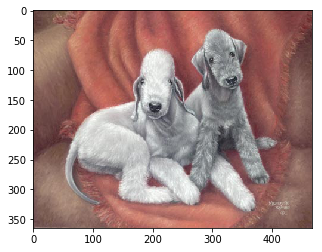

Dogs Detected!
It looks like a hinese crested


In [31]:
for img_file in os.listdir('C:/Users/user/Pictures/dogImages/dogImages/forcheck'):
    img_path = os.path.join('C:/Users/user/Pictures/dogImages/dogImages/forcheck', img_file)
    run_app(img_path)